## 📊 Model Evaluation and Interpretation (Task 5)

In this task, the **final churn prediction model selected in Task-4**
(Random Forest – `best_rf`) is evaluated on unseen test data.

The evaluation focuses on:
- Classification performance metrics
- Confusion matrix analysis
- ROC curve and AUC score
- Feature importance for business interpretation

Using the **same best model from Task-4** ensures metric consistency
and avoids performance drops due to retraining.


## 1️⃣ Import Required Libraries

The following libraries are used for:
- Data manipulation
- Model training and evaluation
- ROC curve analysis
- Feature importance visualization

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

## 2️⃣ Load the Cleaned Dataset

The cleaned and preprocessed dataset created in Task 1 is used for evaluating
the final churn prediction model.


In [13]:
data = pd.read_csv(
    "../Task-1_Data_Preparation/dataset/Telco_Customer_Churn_Dataset_cleaned.csv"
)

data.head()


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


## 3️⃣ Feature–Target Separation

**Target Variable:** `Churn_Yes`  
**Features:** All remaining columns except `customerID`


In [14]:
X = data.drop(["Churn_Yes", "customerID"], axis=1)
y = data["Churn_Yes"]


## 4️⃣ Train–Test Split

The dataset is split using stratified sampling to preserve the original churn distribution.

- Training set: 80%
- Testing set: 20%


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 5️⃣  Loading Final Model from Task-4

The best-performing Random Forest model obtained in **Task-4**
using GridSearchCV is loaded here for final evaluation.

This ensures:
- Consistent performance metrics
- No retraining bias
- Reproducible results across tasks


In [16]:
import joblib

# Load the trained best Random Forest model from Task-4
rf_model = joblib.load(
    "../Task-4_Churn_Prediction_Model/best_random_forest_model.pkl"
)

rf_model


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 6️⃣ Model Performance Evaluation

The model is evaluated on the test dataset using the following metrics:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC


In [17]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_prob)
}

metrics


{'Accuracy': 0.772888573456352,
 'Precision': 0.552734375,
 'Recall': 0.7566844919786097,
 'F1-Score': 0.6388261851015802,
 'ROC-AUC': 0.8426489963574362}

## 7️⃣ Confusion Matrix Analysis

The confusion matrix shows how well the model distinguishes
between churned and non-churned customers.

False negatives (churners predicted as non-churners) are particularly costly,
as they represent customers who may leave without preventive action.


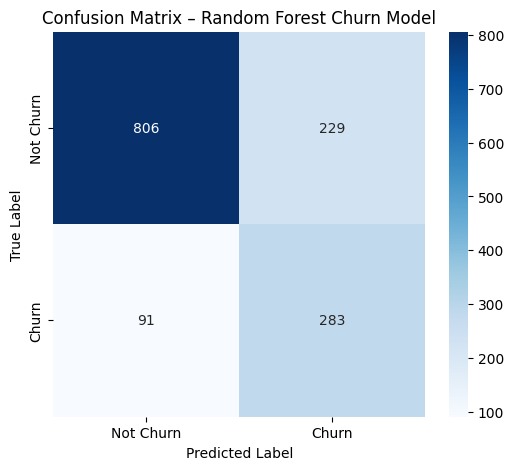

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Churn", "Churn"],
    yticklabels=["Not Churn", "Churn"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Random Forest Churn Model")
plt.show()


## 8️⃣ ROC Curve Analysis

The ROC curve illustrates the model’s ability to distinguish
between churned and non-churned customers across classification thresholds.

An AUC value above **0.8** indicates strong discriminatory power
between churned and non-churned customers.


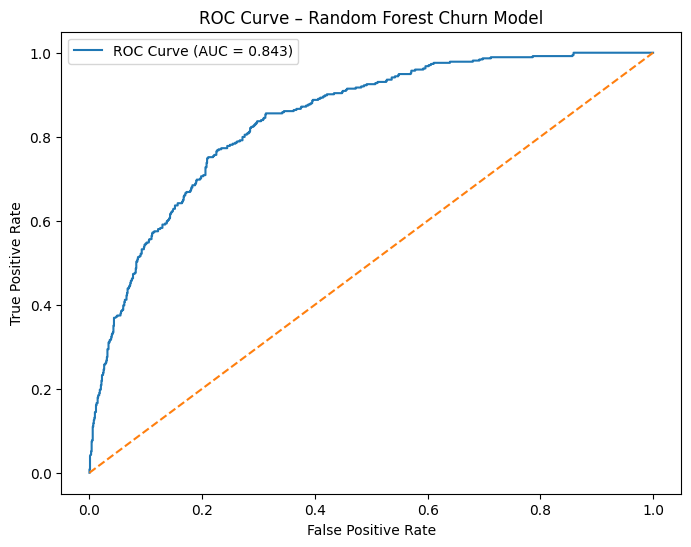

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {metrics['ROC-AUC']:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest Churn Model")
plt.legend()
plt.show()


## 9️⃣ Feature Importance Analysis

Random Forest feature importance helps identify the most influential
factors contributing to customer churn, enabling actionable
business strategies.


In [20]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
1,tenure,0.172815
3,TotalCharges,0.140697
2,MonthlyCharges,0.105536
25,Contract_Two year,0.100271
10,InternetService_Fiber optic,0.067723
28,PaymentMethod_Electronic check,0.050826
24,Contract_One year,0.039511
13,OnlineSecurity_Yes,0.037791
19,TechSupport_Yes,0.028310
16,DeviceProtection_No internet service,0.019274


## 🔟 Visualization of Top Features

The top 10 most influential features affecting customer churn are visualized below.


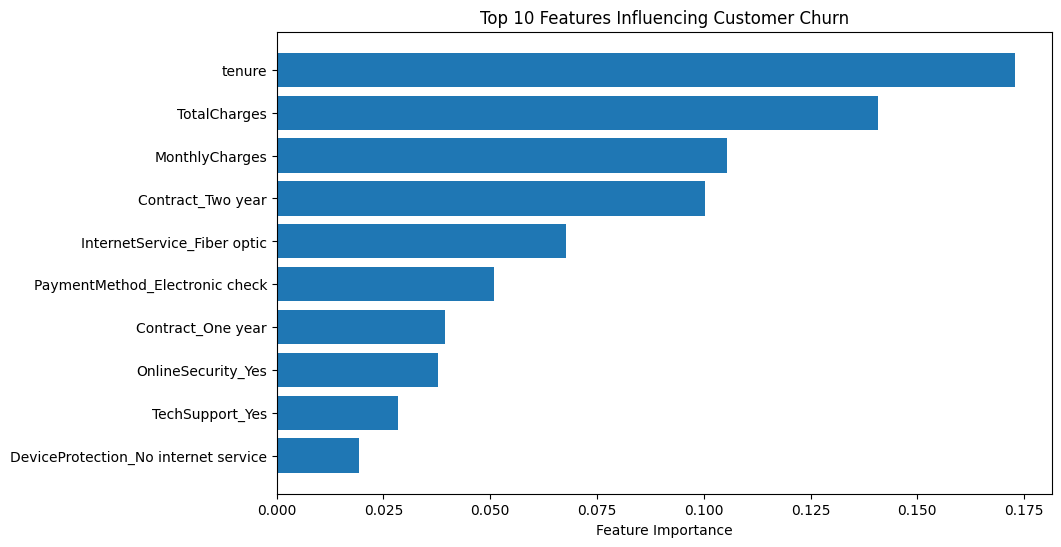

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance["Feature"][:10][::-1],
    feature_importance["Importance"][:10][::-1]
)

plt.xlabel("Feature Importance")
plt.title("Top 10 Features Influencing Customer Churn")
plt.show()


## 🧠 Final Insights

Key drivers of customer churn identified by the model include:
- Short-term contracts
- Low customer tenure
- High monthly charges
- Electronic check payment method
- Internet and service-related features

These insights can support targeted retention strategies such as
contract incentives, pricing optimization, and service bundling.
